In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import json
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('transactions.csv')
payDaatDF = pd.json_normalize(df['payment_data'].apply(json.loads))

merchantDF_temp = df[['id', 'merchant']].dropna()
merchantDF = pd.json_normalize(merchantDF_temp['merchant'].apply(json.loads))

In [3]:
## Quais categorias apresentam maior variabilidade de gasto?
def variabilidade_gasto(df, type_transac):
  df_ = df[df['type'] == type_transac]
  variabilidade = df_.groupby('category')['amount'].std()
  return variabilidade.sort_values(ascending=False)

In [4]:
def outliers_persuit(df, type_transac, categorias):
  df_ = df[df['type'] == type_transac]
  df_filtrado = df[df['category'].isin(categorias)]
  df_filtrado['amount'] = df_filtrado['amount'].abs()
  # Tamanho dinâmico baseado no número de categorias
  altura = max(6, len(categorias) * 0.8)

  plt.figure(figsize=(16, altura))
  sns.set(style="whitegrid")

  # Boxplot com cores e estilo
  ax = sns.boxplot(data=df_filtrado, x='category', y='amount', palette='Set2')

  # Ajustes visuais
  plt.xticks(rotation=45, fontsize=12)
  plt.yticks(fontsize=12)
  plt.title('Distribuição de Amount por Categoria Selecionada ('+type_transac+')', fontsize=16, weight='bold')
  plt.xlabel('Categoria', fontsize=14)
  plt.ylabel('Amount (R$)', fontsize=14)
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()

In [5]:
def remover_outliers_geral(df, type_transac, lim_inf=1.5, lim_sup=1.5):
    # Filtrar por tipo de transação
    df_filtrado = df[df['type'] == type_transac].copy()

    # Garantir valores positivos
    df_filtrado['amount'] = df_filtrado['amount'].abs()

    # Calcular limites usando IQR
    Q1 = df_filtrado['amount'].quantile(0.25)
    Q3 = df_filtrado['amount'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - lim_inf * IQR
    limite_superior = Q3 + lim_sup * IQR

    # Remover outliers
    df_sem_outliers = df_filtrado[(df_filtrado['amount'] >= limite_inferior) & (df_filtrado['amount'] <= limite_superior)]

    return df_sem_outliers

In [6]:
variabilidade_gasto(df, 'DEBIT').head(10)

category
Aluguel de veículos                            3710.571119
Transferência mesma titularidade               2667.964383
Livraria                                       2243.586177
Serviços                                        666.607469
Transferência mesma titularidade - Dinheiro     518.684233
Supermercado                                    499.499108
Vestiário                                       434.151574
Transferência - PIX                             406.595770
Serviços automotivos                            307.657687
Pedágios e pagamentos no veículo                284.161339
Name: amount, dtype: float64

In [7]:
variabilidade_gasto(df, 'CREDIT')

category
Transferência - PIX                   2554.177378
Transferência - Câmbio                2471.380512
Transferência para terceiros - PIX     445.547983
Delivery de alimentos                  375.827254
Transferência mesma titularidade       349.027939
Transferência - TED                     70.399551
Táxi e transporte privado urbano         0.735391
Juros de rendimentos de dividendos       0.000000
Transferência - Dinheiro                      NaN
Name: amount, dtype: float64

In [8]:
categs_credit = ['Transferência - PIX', 'Transferência - Câmbio', 'Transferência para terceiros - PIX', 'Delivery de alimentos', 'Transferência mesma titularidade', 'Transferência - TED']
categs_debit = ['Aluguel de veículos', 'Transferência mesma titularidade', 'Livraria', 'Serviços', 'Transferência mesma titularidade - Dinheiro', 'Supermercado','Vestiário', 'Transferência - PIX', 'Serviços automotivos', 'Pedágios e pagamentos no veículo','Compras', 'Lazer','Cinema, Teatro e Concertos', 'Transferência para terceiros - PIX','Alimentos e bebidas', 'Delivery de alimentos', 'Investimentos', 'Restaurantes, bares e lanchonetes']

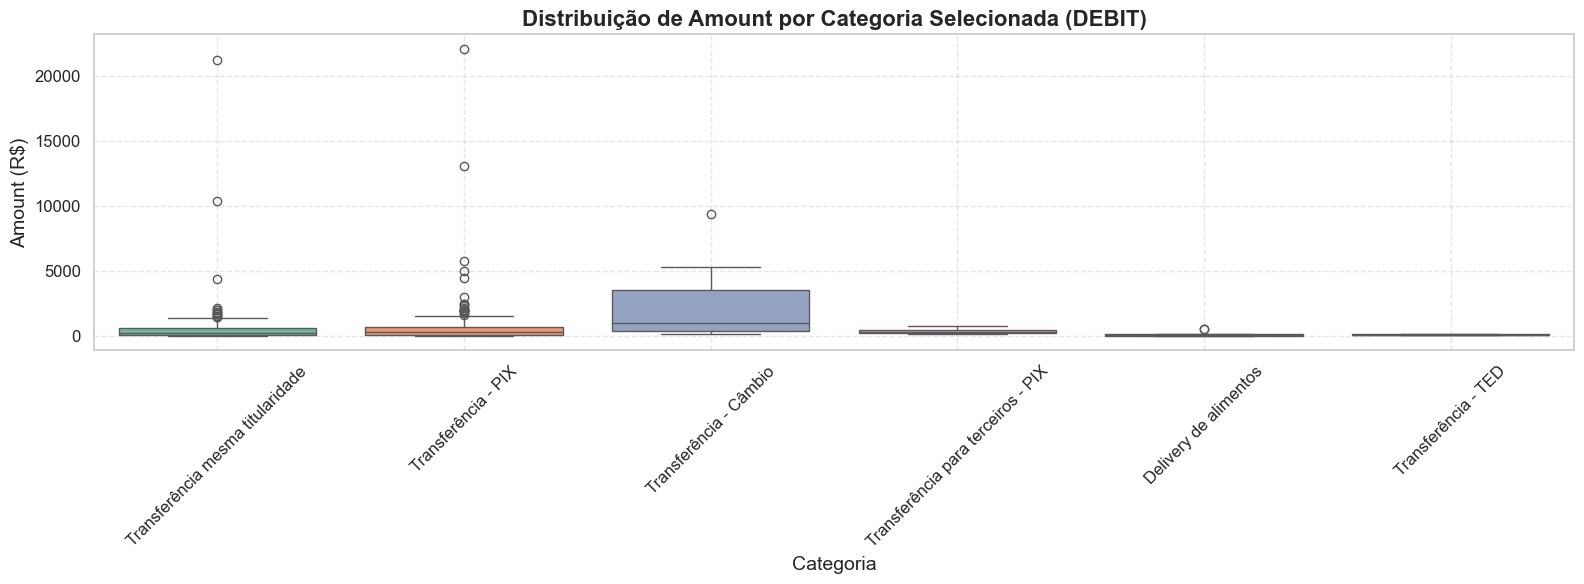

In [9]:
outliers_persuit(df, 'DEBIT', categs_credit)

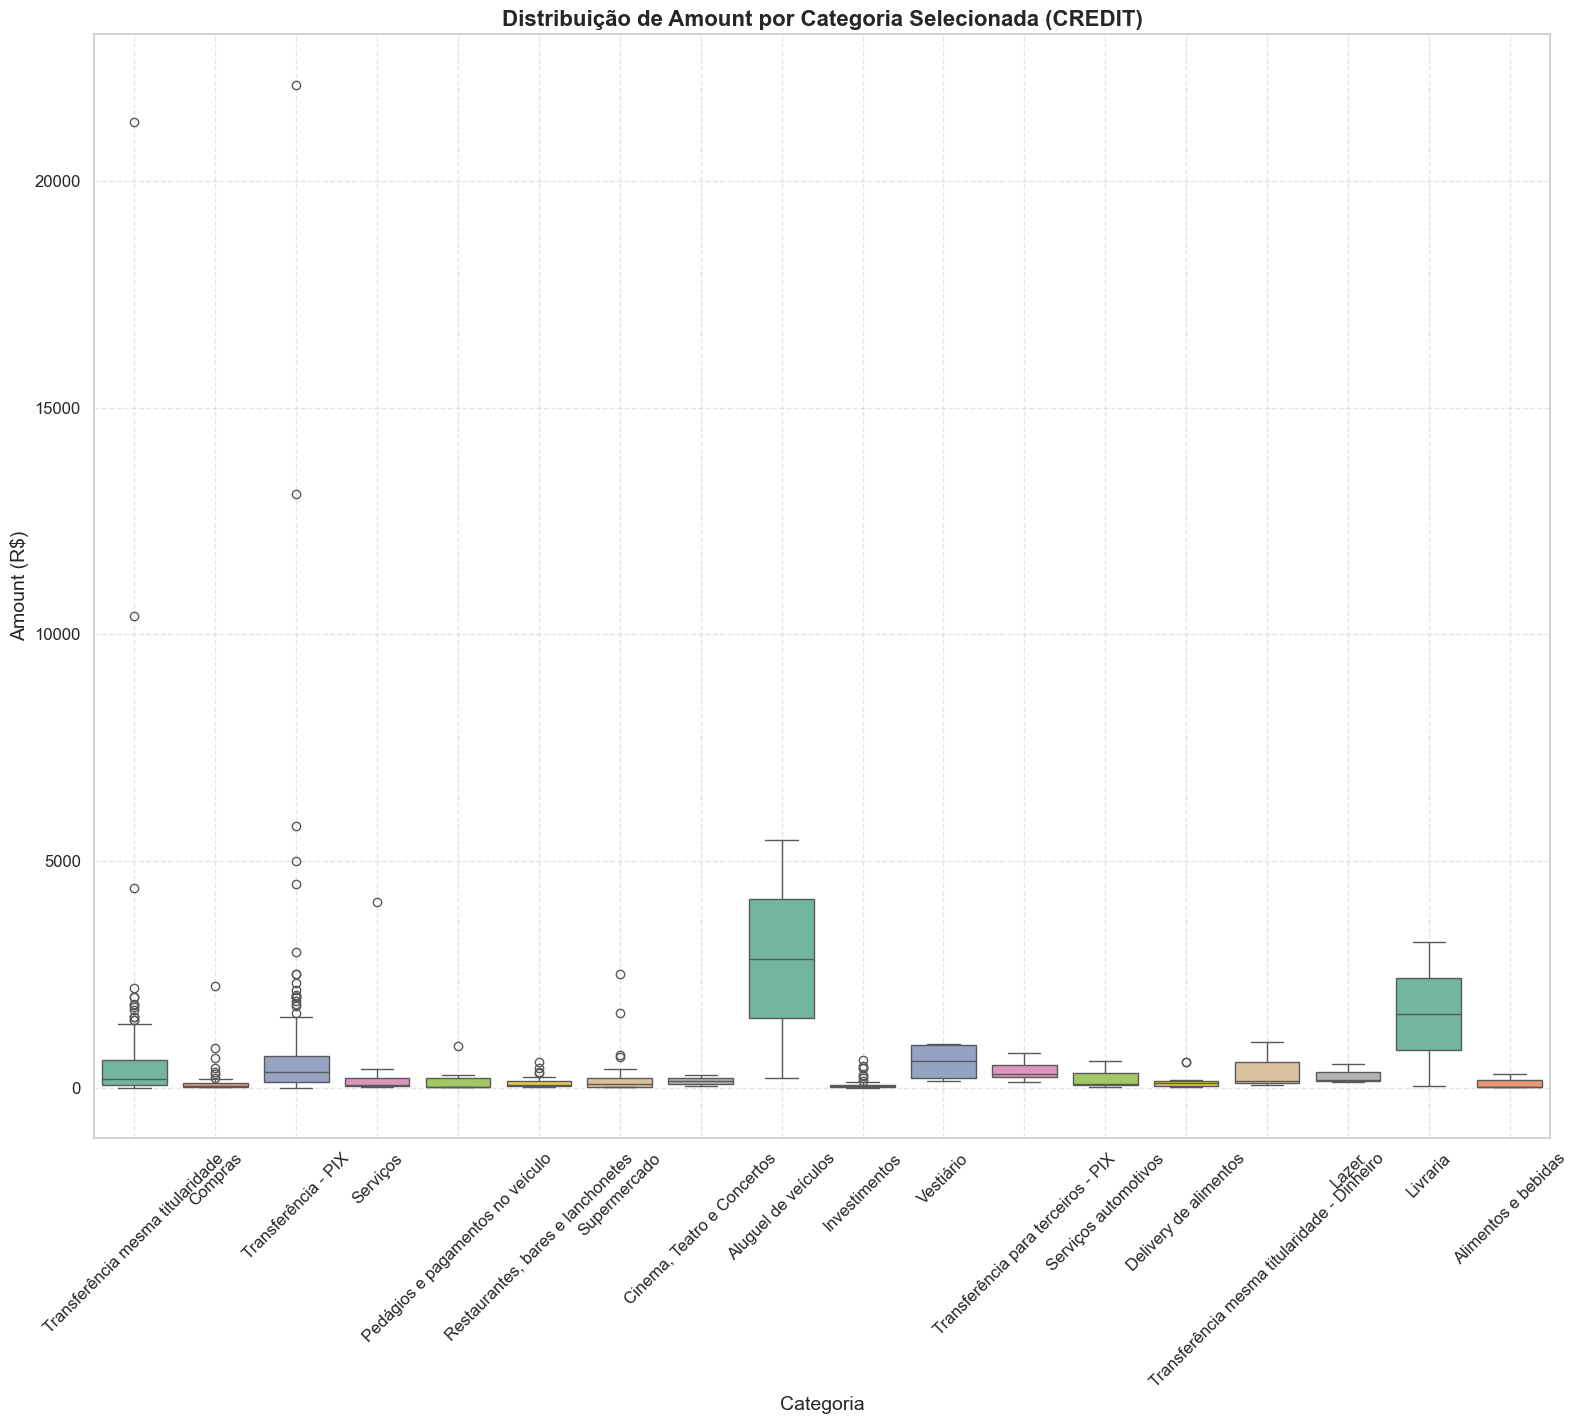

In [10]:
outliers_persuit(df, 'CREDIT', categs_debit)

📐 O que é o IQR?

O IQR (Interquartile Range) é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) de um conjunto de dados:
IQR=Q3−Q1\text{IQR} = Q3 - Q1

    Q1 (25%): valor abaixo do qual estão os 25% menores dados

    Q3 (75%): valor abaixo do qual estão os 75% menores dados

🚨 Como detectar outliers com IQR

Valores são considerados outliers se estiverem muito abaixo de Q1 ou muito acima de Q3, fora dos seguintes limites:
Limite inferior=Q1−1.5⋅IQR\text{Limite inferior} = Q1 - 1.5 \cdot \text{IQR}
Limite superior=Q3+1.5⋅IQR\text{Limite superior} = Q3 + 1.5 \cdot \text{IQR}

Qualquer valor fora desse intervalo é considerado atípico.
🧠 Por que usar IQR?

    Robusto contra extremos: não é afetado por valores muito altos ou baixos.

    Não assume distribuição normal: funciona bem com dados assimétricos.

    Simples e eficaz: ótimo para análise exploratória e limpeza de dados.

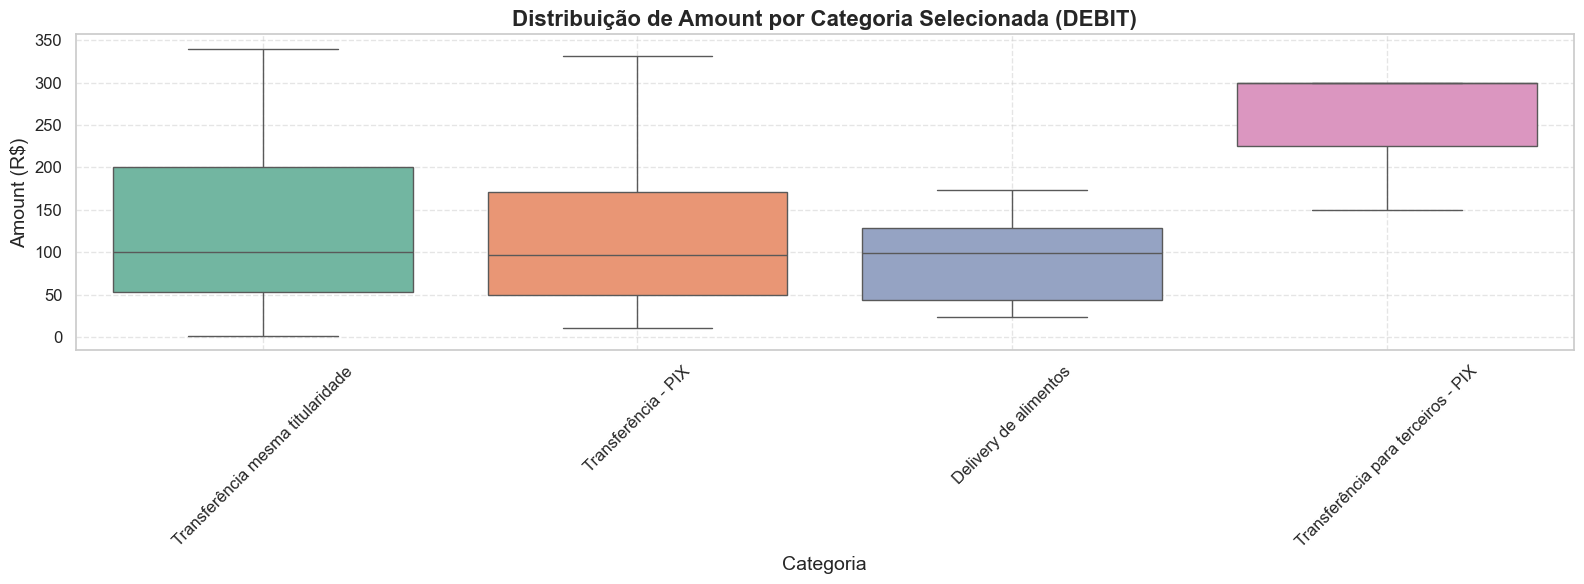

In [11]:
outliers_persuit(remover_outliers_geral(df, 'DEBIT', 1.5, 1.1), 'DEBIT', categs_credit)

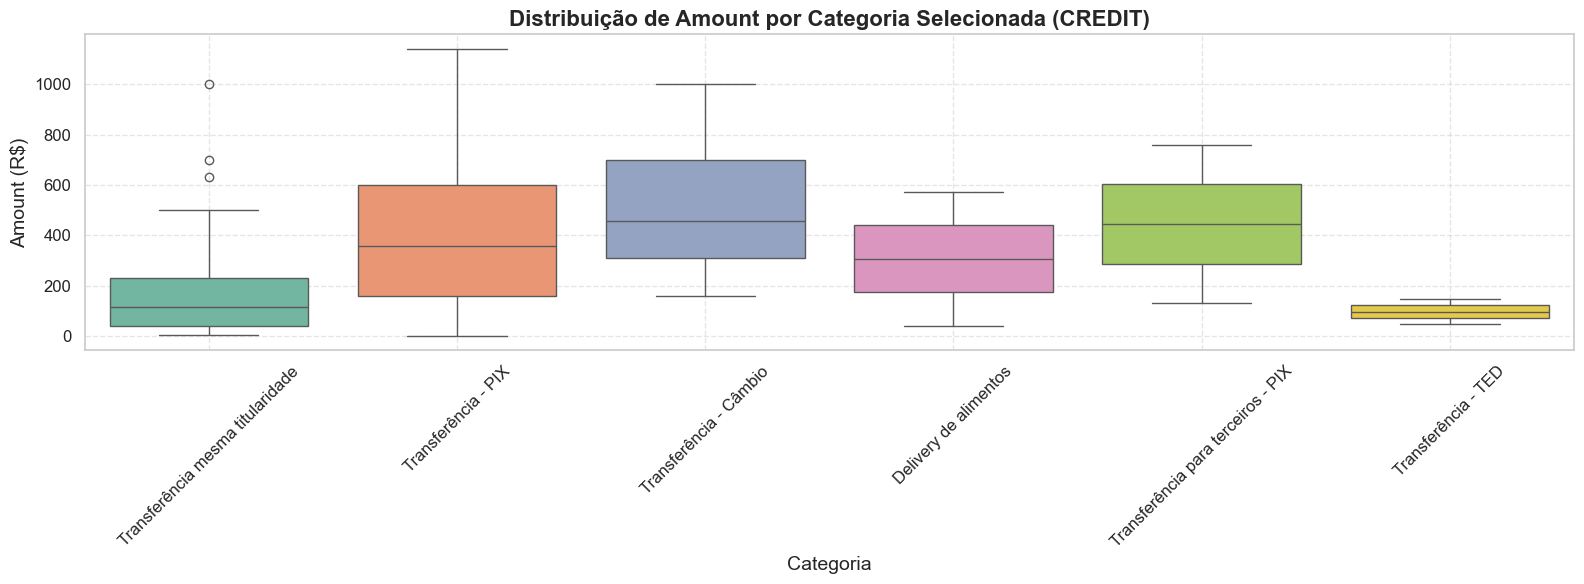

In [12]:
outliers_persuit(remover_outliers_geral(df, 'CREDIT', .9, 1), 'CREDIT', categs_credit)